In [93]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests


In [53]:
tf_expr = pd.read_pickle("pydata/tfs_tpmlog2p1.pkl")

In [54]:
model = pd.read_pickle("pydata/model_data.pkl")

Getting only metastatic/primary

In [55]:
model["PrimaryOrMetastasis"].value_counts()

PrimaryOrMetastasis
Primary       1359
Metastatic     728
Unknown         21
Recurrent       20
Name: count, dtype: int64

In [56]:
model = model.loc[model["PrimaryOrMetastasis"].isin(["Primary", "Metastatic"]), :]

In [57]:
tf_expr.index.values[0:5]

array(['ACH-000873', 'ACH-000860', 'ACH-000439', 'ACH-000318',
       'ACH-001142'], dtype=object)

In [58]:
model_found = [m for m in model["ModelID"] if m in tf_expr.index]

In [59]:
len(model_found)

1805

In [60]:
tf_expr = tf_expr.loc[model_found, :]

In [61]:
tf_expr.head()

,TFAP2A,TFAP2B,TFAP2C,TFAP2D,TFAP2E,ARID3A,ARID3B,ARID3C,ARID5A,ARID5B,...,THAP5,THAP6,THAP7,THAP8,THAP9,ZBED9,ZNF875,CBLL2,ZUP1,TBXT
ACH-000001,5.366026,0.015805,3.202589,-0.002249,1.299721,2.362425,1.971519,0.082000,2.436130,4.022346,...,4.668014,3.375819,3.907681,3.264017,2.898227,1.638027,5.920020,-0.000634,3.853411,-0.019787
ACH-000002,0.189191,0.015805,0.033685,-0.002249,1.233638,2.984378,0.628783,-0.010908,3.600589,0.194203,...,2.740764,1.356758,4.377081,0.633773,0.858875,-0.030704,3.996353,-0.000634,3.917010,-0.019787
ACH-000003,1.814698,0.043962,4.616994,-0.002249,0.946006,4.652805,3.663231,0.031376,1.783410,4.218162,...,2.728739,2.120625,3.616242,2.489645,1.912922,0.011311,3.474436,-0.000634,3.427550,-0.019787
ACH-000004,0.088768,0.015805,-0.033300,-0.002249,3.216945,3.353456,4.377950,-0.010908,3.489571,0.429204,...,3.852103,3.033849,4.525351,1.592765,1.527752,0.647501,4.110641,-0.000634,3.462621,-0.005573
ACH-000006,0.808240,0.015805,0.953046,-0.002249,3.261500,4.436086,3.447106,0.091846,3.522031,0.726584,...,4.133933,3.822511,3.835450,1.705494,1.706260,0.565454,4.637528,-0.000634,4.340264,-0.019787


In [80]:
model = model.loc[model["ModelID"].isin(tf_expr.index.values), :]

In [84]:
model.set_index("ModelID", inplace=True)

In [85]:
model.head()

,PatientID,CellLineName,StrippedCellLineName,DepmapModelType,OncotreeLineage,OncotreePrimaryDisease,OncotreeSubtype,OncotreeCode,PatientSubtypeFeatures,RRID,...,EngineeredModelDetails,CulturedResistanceDrug,PublicComments,CCLEName,HCMIID,ModelAvailableInDbgap,ModelSubtypeFeatures,WTSIMasterCellID,SangerModelID,COSMICID
ModelID,,,,,,,,,,,,,,,,,,,,,
ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,HGSOC,Ovary/Fallopian Tube,Ovarian Epithelial Tumor,High-Grade Serous Ovarian Cancer,HGSOC,None,CVCL_0465,...,None,None,None,NIHOVCAR3_OVARY,None,Available in SRA,None,2201.0,SIDM00105,905933.0
ACH-000002,PT-5qa3uk,HL-60,HL60,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,"TP53(del), CDKN2A and NRAS mutations [PubMed=2...",CVCL_0002,...,None,None,None,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,None,Available in SRA,None,55.0,SIDM00829,905938.0
ACH-000003,PT-puKIyc,CACO2,CACO2,COAD,Bowel,Colorectal Adenocarcinoma,Colon Adenocarcinoma,COAD,None,CVCL_0025,...,None,None,None,CACO2_LARGE_INTESTINE,None,Available in SRA,None,NaN,SIDM00891,NaN
ACH-000004,PT-q4K2cp,HEL,HEL,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,"JAK2 and TP53 mutations,",CVCL_0001,...,None,None,None,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,None,Available in SRA,None,783.0,SIDM00594,907053.0
ACH-000006,PT-ej13Dz,MONO-MAC-6,MONOMAC6,AMOL,Myeloid,Acute Myeloid Leukemia,Acute Monoblastic/Monocytic Leukemia,AMOL,"KMT2A-MLLT3, TP53 Arg273His",CVCL_1426,...,None,None,None,MONOMAC6_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,None,Available in SRA,None,2167.0,SIDM01023,908148.0


In [62]:
pca = sm.PCA(tf_expr, ncomp=2)
pca_df = pca.factors

In [63]:
pca_df.head()

,comp_0,comp_1
ACH-000001,0.012193,-0.005065
ACH-000002,-0.033879,0.035815
ACH-000003,-0.024806,0.017511
ACH-000004,0.011037,0.033806
ACH-000006,0.016010,0.039811


In [67]:
pca_df = pca_df.merge(model[["ModelID", "OncotreeLineage", "PrimaryOrMetastasis"]], how="left", left_index=True, right_on = "ModelID")

In [69]:
color_map = { metastatic: i for i, metastatic in enumerate(pca_df["PrimaryOrMetastasis"].unique()) }

In [70]:
pca_df.head()

,comp_0,comp_1,ModelID,OncotreeLineage,PrimaryOrMetastasis
0,0.012193,-0.005065,ACH-000001,Ovary/Fallopian Tube,Metastatic
1,-0.033879,0.035815,ACH-000002,Myeloid,Primary
2,-0.024806,0.017511,ACH-000003,Bowel,Primary
3,0.011037,0.033806,ACH-000004,Myeloid,Primary
5,0.016010,0.039811,ACH-000006,Myeloid,Primary


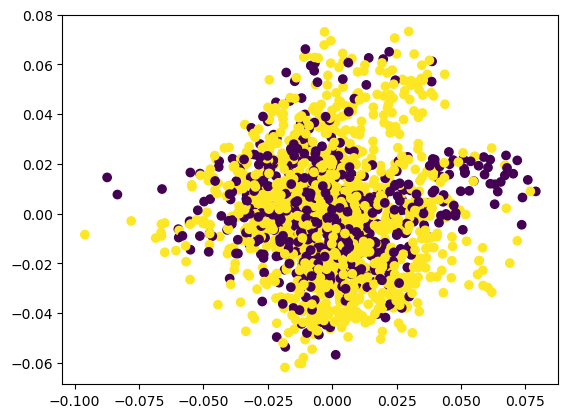

In [72]:
plt.scatter(pca_df["comp_0"], pca_df["comp_1"], 
            c = pca_df["PrimaryOrMetastasis"].map(color_map))

## Getting differentially expressed genes

In [118]:
diff_expr = []
for lineage in model["OncotreeLineage"].unique():
    pvalues = []
    log_fold_changes = []
    cell_lines = model.loc[model["OncotreeLineage"] == lineage].index

    for gene in tf_expr.columns:    
        data = pd.concat([tf_expr.loc[cell_lines, gene], model.loc[cell_lines, 'PrimaryOrMetastasis']], axis=1)
        data.columns = ['expression', 'condition']
        
        metastatic_expr = data.loc[data['condition'] == "Metastatic",  'expression']
        primary_expr = data.loc[data['condition'] == "Primary",  'expression']

        p = mannwhitneyu(metastatic_expr, primary_expr)[1]
        log_fold_change = np.log2((metastatic_expr.mean() + 1) / (primary_expr.mean() + 1))

        pvalues.append(p)
        log_fold_changes.append(log_fold_change)

    fdr = multipletests(pvalues, method='fdr_bh')[1]

    # combine p-values, adjusted p-values and log fold changes into a DataFrame for easy viewing
    results = pd.DataFrame({
        'gene': tf_expr.columns,
        'p_value': pvalues,
        'fdr': fdr,
        'log_fold_change': log_fold_changes,
        'lineage': lineage
    })

    diff_expr.append(results)

/var/folders/_5/qbyf0kk5779gpj3nnpqbc7wr0000gn/T/ipykernel_25804/3016646103.py:14: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  p = mannwhitneyu(metastatic_expr, primary_expr)[1]


In [130]:
diff_expr = pd.concat(diff_expr, axis=0)

In [131]:
diff_expr_significant = diff_expr[diff_expr["fdr"] < 0.1]

In [132]:
diff_expr_significant["lineage"].value_counts()

lineage
Lymphoid     159
Pleura       124
Lung          55
CNS/Brain     50
Prostate      48
Thyroid       28
Breast        18
Myeloid        1
Name: count, dtype: int64

In [123]:
import seaborn as sns

<Axes: xlabel='log_fold_change', ylabel='Density'>

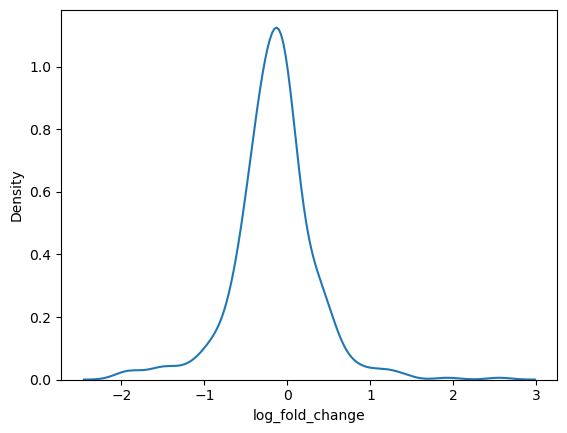

In [133]:
sns.kdeplot(data = diff_expr_significant, x = "log_fold_change")

In [136]:
diff_expr_significant.loc[abs(diff_expr_significant["log_fold_change"]) > 1]

,gene,p_value,fdr,log_fold_change,lineage
1470,LTF,0.000306,0.096660,-1.094918,Breast
67,HEYL,0.001337,0.093005,1.368542,CNS/Brain
122,TCF15,0.001131,0.093005,1.154278,CNS/Brain
162,CREB5,0.002204,0.095497,-1.532030,CNS/Brain
180,MAFF,0.001182,0.093005,-1.143712,CNS/Brain
226,GLIS3,0.001206,0.093005,-1.933688,CNS/Brain
556,ZNF365,0.001620,0.093005,-1.482747,CNS/Brain
955,CUX2,0.000958,0.093005,1.395876,CNS/Brain
1004,ETS1,0.002081,0.095497,-1.464266,CNS/Brain
1006,ETV1,0.001078,0.093005,-1.569753,CNS/Brain
